In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder

In [ ]:
def preprocess_image(image_path, img_size=(64, 64)):
    image = load_img(image_path, target_size=img_size)
    image = img_to_array(image)
    image = image/255.0
    return image

In [ ]:
import zipfile
import os

# Define the file path
zip_file_path = '/content/data_n.zip'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/data_n')  # Specify the folder where files will be extracted

# Verify extraction
print("Files extracted to:", os.listdir('/content/data_n'))


Files extracted to: ['data']


In [ ]:
data = '/content/data_n/data'

In [ ]:
images = []
labels = []

In [ ]:
for label_dir in os.listdir(data):
    if os.path.isdir(os.path.join(data, label_dir)):
        for fle in os.listdir(os.path.join(data, label_dir)):
            image_path = os.path.join(data, label_dir, fle)
            images.append(preprocess_image(image_path))
            labels.append(label_dir)

In [ ]:
images = np.array(images)
labels = np.array(labels)

In [ ]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
num_classes = len(label_encoder.classes_)
labels_categorical = to_categorical(labels_encoded, num_classes)

In [ ]:
np.save('classes.npy', label_encoder.classes_)

In [ ]:
def model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [ ]:
input_shape = (64, 64, 3)
model = model(input_shape, num_classes)
model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 35)                  │           4,515 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,457,187 (9.37 MB)

 Trainable params: 2,457,187 (9.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(images, labels_categorical, epochs = 10, validation_split = 0.2)


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 56s 300ms/step - accuracy: 0.8058 - loss: 0.7805 - val_accuracy: 0.0000e+00 - val_loss: 19.2086
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 75s 262ms/step - accuracy: 1.0000 - loss: 6.6710e-05 - val_accuracy: 0.0000e+00 - val_loss: 28.0489
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 46s 262ms/step - accuracy: 1.0000 - loss: 1.5480e-06 - val_accuracy: 0.0000e+00 - val_loss: 33.5628
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 82s 263ms/step - accuracy: 1.0000 - loss: 4.2795e-07 - val_accuracy: 0.0000e+00 - val_loss: 36.0431
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 45s 256ms/step - accuracy: 1.0000 - loss: 2.4522e-07 - val_accuracy: 0.0000e+00 - val_loss: 37.7243
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 83s 261ms/step - accuracy: 1.0000 - loss: 1.6478e-07 - val_accuracy: 0.0000e+00 - val_loss: 39.0852
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 82s 260ms/step - accuracy: 1.0000 - loss: 1.1433e-07 - val_accuracy: 0.0000e+00 - val_loss: 40.2037
Epoch 8/10
175/175 ━━━━━

In [ ]:
# Saving the trained model to a file
model.save('model.h5')


In [ ]:
def predict_sign(image_path):
    image = preprocess_image(image_path)
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    prediction_class = np.argmax(prediction)
    return label_encoder.inverse_transform([prediction_class])[0]

In [ ]:
image_path = '/content/data_n/data/7/0.jpg'
prediction = predict_sign(image_path)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
7


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model

In [ ]:
# Assuming the model is already trained and 'history' is the output from model.fit
# Get predictions on validation/test data
predictions = model.predict(images)  # Replace 'images' with your validation/test set

# Get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels (for validation or test data)
true_labels = np.argmax(labels_categorical, axis=1)  # Assuming labels_categorical is in one-hot encoding

# 1. Print the Classification Report
print(classification_report(true_labels, predicted_labels))

219/219 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       200
           1       0.76      1.00      0.86       200
           2       1.00      1.00      1.00       200
           3       1.00      1.00      1.00       200
           4       1.00      1.00      1.00       200
           5       0.93      1.00      0.96       200
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       200
           8       1.00      1.00      1.00       200
           9       0.81      1.00      0.89       200
          10       0.00      0.00      0.00       200
          11       0.00      0.00      0.00       200
          12       1.00      1.00      1.00       200
          13       0.70      1.00      0.82       200
          14       1.00      1.00      1.00       200
          15       0.71      1.00      0.83       200
          16       0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


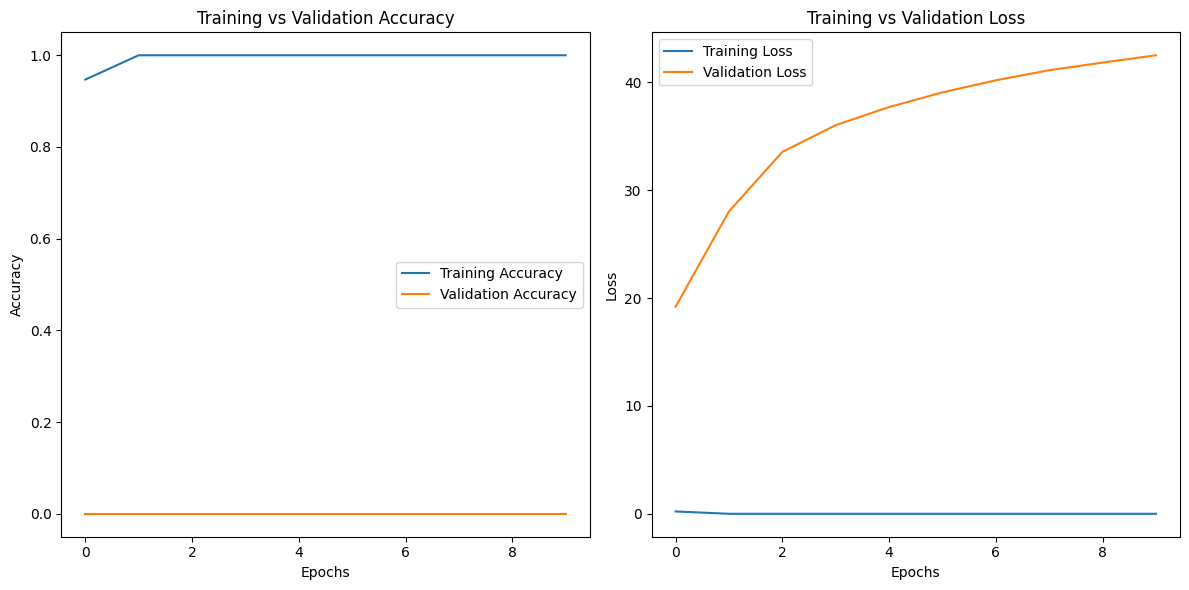

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output of model.fit()
# For example: history = model.fit(images, labels_categorical, epochs=10, validation_split=0.2)

# 1. Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 2. Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming 'model' is your trained model and 'images' and 'labels_categorical' are your validation/test data
# Get predictions on validation/test data
predictions = model.predict(images)  # Replace 'images' with your validation/test set

# Get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels (for validation or test data)
true_labels = np.argmax(labels_categorical, axis=1)  # Assuming labels_categorical is in one-hot encoding

# 1. Compute Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# 2. Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)


219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step
Confusion Matrix:
[[200   0   0 ...   0   0   0]
 [  0 200   0 ...   0   0   0]
 [  0   0 200 ...   0   0   0]
 ...
 [  0   0   0 ... 200   0   0]
 [  0   0   0 ...   0 200   0]
 [  0   0   0 ...   0   0   0]]


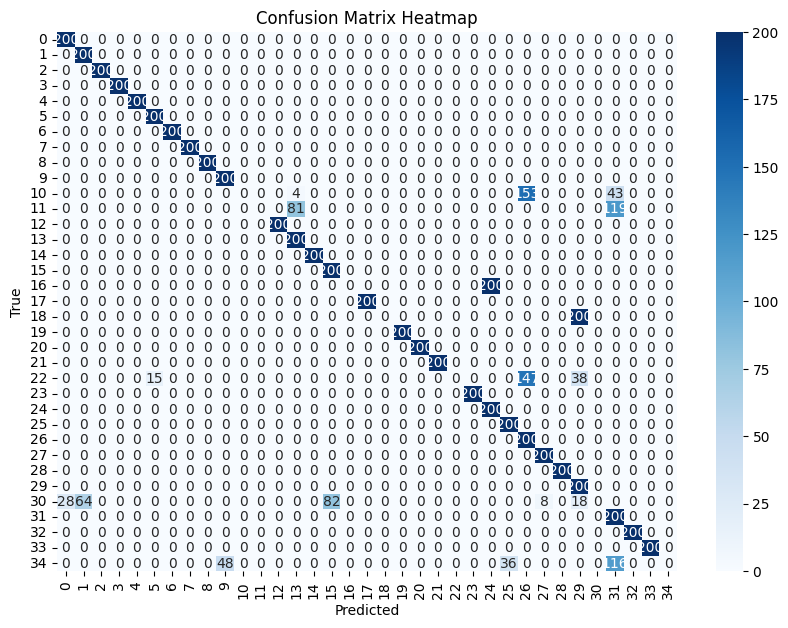

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels (for validation or test data)
true_labels = np.argmax(labels_categorical, axis=1)  # Assuming labels_categorical is in one-hot encoding

# 1. Compute Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# 2. Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()